# IPython Matplotlib and Pandas Demo

In [4]:
import datetime 

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

## Get Google Stock Data from Yahoo Finance

In [5]:
# Get data for given stocks between these datetimes  
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2016, 1, 27)
stock_df = web.DataReader("GOOGL", 'yahoo', start, end)

In [6]:
# Show some of the data
stock_df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,719.420006,727.000004,716.550015,723.250034,5077500,361.987004
2013-01-03,724.929993,731.930005,720.720035,723.670024,4631700,362.197209
2013-01-04,729.340008,741.470017,727.679987,737.969980,5521400,369.354344
2013-01-07,735.449981,739.380007,730.580038,734.749998,3308000,367.742742
2013-01-08,735.540039,736.300021,724.430006,733.300033,3348800,367.017034


In [7]:
# How many rows?
print len(stock_df)

773


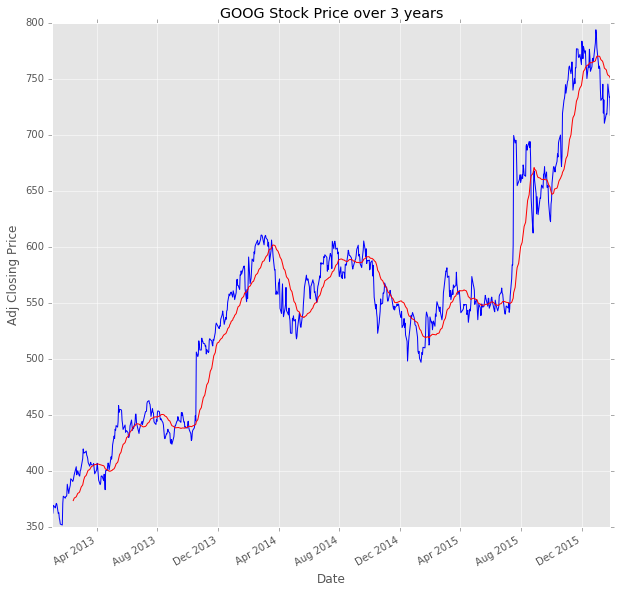

In [12]:
def plot_stock_data(data):
    # Lets see a graph
    axes = data.plot(figsize=(10, 10), color='b')

    # Computer a rolling mean over a month and plot as new line
    rolling = pd.rolling_mean(data, 30)
    rolling.plot(ax=axes, color='r', legend=0)

    # Always label your axes
    plt.title("GOOG Stock Price over 3 years")
    plt.xlabel('Date')
    plt.ylabel('Adj Closing Price')
    plt.show()

plot_stock_data(stock_df['Adj Close'])

## Filtering Data into Sub-DataFrames

In [13]:
# Lets filter this data by date, so we only see after the year 2014
filtered_stock_df = stock_df[ stock_df.index > datetime.datetime(2015, 1, 1) ]
filtered_stock_df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,532.599976,535.799988,527.880005,529.549988,1324000,529.549988
2015-01-05,527.150024,527.989990,517.750000,519.460022,2059100,519.460022
2015-01-06,520.500000,521.210022,505.549988,506.640015,2722800,506.640015
2015-01-07,510.950012,511.489990,503.649994,505.149994,2345900,505.149994
2015-01-08,501.510010,507.500000,495.019989,506.910004,3652700,506.910004


In [14]:
# Confirm its filtered by showing less rows
len(filtered_stock_df)

269

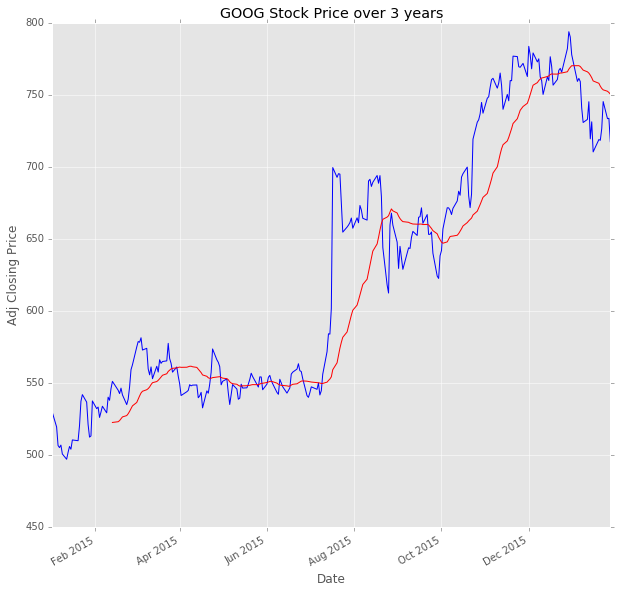

In [15]:
# Plot the filtered data
plot_stock_data(filtered_stock_df['Adj Close'])